<h2>Build a binary classifier to classify digit 0 against all the other digits at MNIST dataset.</h2>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0
# read train data
for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:]) #float형으로 변형
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    
   
    count += 1

count = 0
# read test data
for line in data_test:
    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1

In [3]:
print(list_image_train.shape)

(784, 60000)


<h2>load train and test datas from .csv files</h2>

In [21]:
def classifier_0_with_randomfeatures(p):
    #-------this section is for finding out model parameters(theta0_r)-----
    list_label_train_0 = np.empty(num_train, dtype=int) # new array for 0
    # read train data and set 1 or -1 when label is 0 or not
        
    # prediction function
    for i in range(num_train):
        if (list_label_train[i]==0):
            list_label_train_0[i]=1
        else:
            list_label_train_0[i]=-1
    
    R=np.empty((p,size_row * size_col),dtype=float)
    count=0
    for i in range(p): # make random image and set on matrix R
        r=np.random.normal(0,1,size_row * size_col)
        R[count,:]  = r    
        count += 1
        
    A0_r=(R.dot(list_image_train)).T
    theta0_r=((np.linalg.pinv((A0_r.T).dot(A0_r))).dot(A0_r.T)).dot(list_label_train_0) # compute theta0_r using pseudo inverse

    #------------------------------------------------------------------
    
    #---this section is for finding out Tp,Tn,Fp and Fn which are related with error rate ---
    #---this section is executed with training set.
    A0_r_train=(R.dot(list_image_train)).T
    y_train=A0_r_train.dot(theta0_r)
    # classify y_train
    for i in range(num_train):
        if(y_train[i]<0):
            y_train[i]=-1
        elif(y_train[i]>=0):
            y_train[i]=1
        
    
    Tp_train=0 
    Tn_train=0 
    Fp_train=0 
    Fn_train=0
    # Comput Tp, Fp, Tn, Fn
    im_average_Tp_train  = np.zeros(size_row * size_col, dtype=float)
    im_average_Tn_train  = np.zeros(size_row * size_col, dtype=float)
    im_average_Fp_train  = np.zeros(size_row * size_col, dtype=float)
    im_average_Fn_train  = np.zeros(size_row * size_col, dtype=float)
    
    for i in range(num_train):
        if(list_label_train[i]==0 and y_train[i]==1):
            Tp_train+=1
            im_average_Tp_train+=list_image_train[:,i]
        elif(list_label_train[i]==0 and y_train[i]==-1):
            Fn_train+=1
            im_average_Fn_train+=list_image_train[:,i]
        elif(list_label_train[i]!=0 and y_train[i]==1):
            Fp_train+=1
            im_average_Fp_train+=list_image_train[:,i]
        elif(list_label_train[i]!=0 and y_train[i]==-1):
            Tn_train+=1
            im_average_Tn_train+=list_image_train[:,i]
            
            
    print('\n\n\n---------------------------------------',)
    print('when p= ',p)
    print('\nabout training set')
    print('Tp:',Tp_train,'Tn:',Tn_train,'Fp:',Fp_train,'Fn:',Fn_train)
    sum_train = 0
    for i in range(num_train):
        sum_train += (list_label_train_0[i]-y_train[i])**2
    print('optimal model parameter when p is ', p, ': ', sum_train)
    # compute average image
    im_average_Tp_train /= Tp_train
    im_average_Tn_train /= Tn_train
    im_average_Fp_train /= Fp_train
    im_average_Fn_train /= Fn_train
    
    plt.subplot(2,2,1)
    plt.title('Tp average image')
    plt.imshow(im_average_Tp_train.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
    frame   = plt.gca(); frame.axes.get_xaxis().set_visible(False); frame.axes.get_yaxis().set_visible(False)
    plt.subplot(2,2,2)
    plt.title('Tn average image')
    plt.imshow(im_average_Tn_train.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
    frame   = plt.gca(); frame.axes.get_xaxis().set_visible(False); frame.axes.get_yaxis().set_visible(False)
    plt.subplot(2,2,3)
    plt.title('Fp average image')
    plt.imshow(im_average_Fp_train.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
    frame   = plt.gca(); frame.axes.get_xaxis().set_visible(False); frame.axes.get_yaxis().set_visible(False)
    plt.subplot(2,2,4)
    plt.title('Fn average image')
    plt.imshow(im_average_Fn_train.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
    frame   = plt.gca(); frame.axes.get_xaxis().set_visible(False); frame.axes.get_yaxis().set_visible(False)
    plt.show()
    
    #------------------------------------------------------------------
    # about test set
    
    A0_r_test=(R.dot(list_image_test)).T
    y=A0_r_test.dot(theta0_r)
    for i in range(num_test):
        if(y[i]<0):
            y[i]=-1
        elif(y[i]>=0):
            y[i]=1
    Tp=0 
    Tn=0 
    Fp=0 
    Fn=0
    im_average_Tp_test  = np.zeros(size_row * size_col, dtype=float)
    im_average_Tn_test  = np.zeros(size_row * size_col, dtype=float)
    im_average_Fp_test  = np.zeros(size_row * size_col, dtype=float)
    im_average_Fn_test  = np.zeros(size_row * size_col, dtype=float)
    # Compute Tp, Fp, Tn, Fn and collect image into each cases
    for i in range(num_test):
        if(list_label_test[i]==0 and y[i]==1):
            Tp+=1
            im_average_Tp_test+=list_image_test[:,i]
        elif(list_label_test[i]==0 and y[i]==-1):
            Fn+=1
            im_average_Fn_test+=list_image_test[:,i]
        elif(list_label_test[i]!=0 and y[i]==1):
            Fp+=1
            im_average_Fp_test+=list_image_test[:,i]
        elif(list_label_test[i]!=0 and y[i]==-1):
            Tn+=1
            im_average_Tn_test+=list_image_test[:,i]
    print('\n\nabout test set')
    print('Tp:',Tp,'Tn:',Tn,'Fp:',Fp,'Fn:',Fn)
    
    # compute average image
    im_average_Tp_test /= Tp
    im_average_Tn_test /= Tn
    im_average_Fp_test /= Fp
    im_average_Fn_test /= Fn
    
    plt.subplot(2,2,1)
    plt.title('Tp average image')
    plt.imshow(im_average_Tp_test.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
    frame   = plt.gca(); frame.axes.get_xaxis().set_visible(False); frame.axes.get_yaxis().set_visible(False)
    plt.subplot(2,2,2)
    plt.title('Tn average image')
    plt.imshow(im_average_Tn_test.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
    frame   = plt.gca(); frame.axes.get_xaxis().set_visible(False); frame.axes.get_yaxis().set_visible(False)
    plt.subplot(2,2,3)
    plt.title('Fp average image')
    plt.imshow(im_average_Fp_test.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
    frame   = plt.gca(); frame.axes.get_xaxis().set_visible(False); frame.axes.get_yaxis().set_visible(False)
    plt.subplot(2,2,4)
    plt.title('Fn average image')
    plt.imshow(im_average_Fn_test.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
    frame   = plt.gca(); frame.axes.get_xaxis().set_visible(False); frame.axes.get_yaxis().set_visible(False)
    plt.show()
    #-----------------------------------------------------------------
    return


$$\sum_i ( f_w(x^(i) - y^(i) )^2$$




---------------------------------------
when p=  8

about training set
Tp: 1682 Tn: 53035 Fp: 1042 Fn: 4241
optimal model parameter when p is  8 :  21132.0


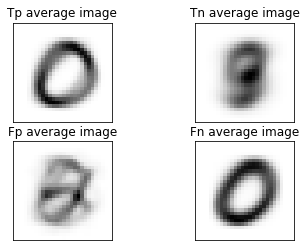



about test set
Tp: 256 Tn: 8873 Fp: 147 Fn: 724


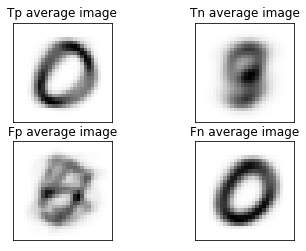




---------------------------------------
when p=  16

about training set
Tp: 2125 Tn: 52688 Fp: 1389 Fn: 3798
optimal model parameter when p is  16 :  20748.0


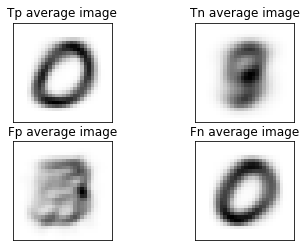



about test set
Tp: 310 Tn: 8811 Fp: 209 Fn: 670


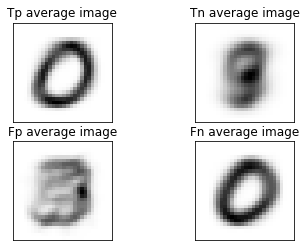




---------------------------------------
when p=  32

about training set
Tp: 4282 Tn: 53026 Fp: 1051 Fn: 1641
optimal model parameter when p is  32 :  10768.0


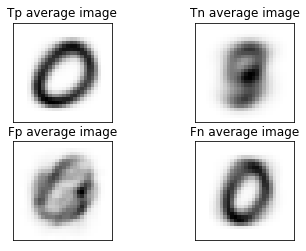



about test set
Tp: 701 Tn: 8883 Fp: 137 Fn: 279


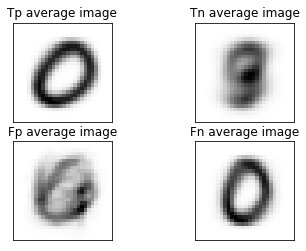




---------------------------------------
when p=  64

about training set
Tp: 4644 Tn: 53536 Fp: 541 Fn: 1279
optimal model parameter when p is  64 :  7280.0


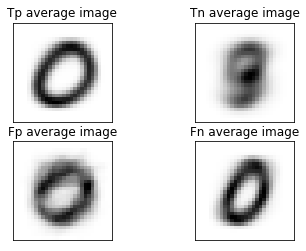



about test set
Tp: 807 Tn: 8931 Fp: 89 Fn: 173


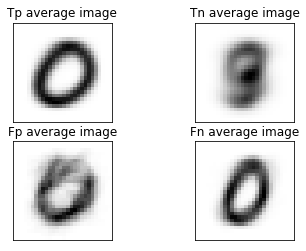




---------------------------------------
when p=  128

about training set
Tp: 5072 Tn: 53706 Fp: 371 Fn: 851
optimal model parameter when p is  128 :  4888.0


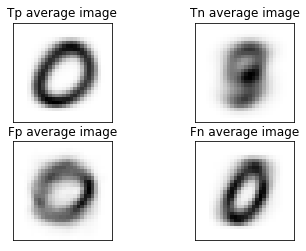



about test set
Tp: 871 Tn: 8959 Fp: 61 Fn: 109


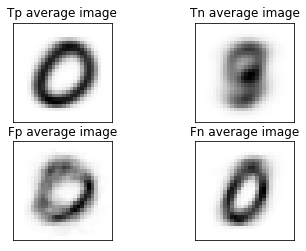




---------------------------------------
when p=  256

about training set
Tp: 5259 Tn: 53738 Fp: 339 Fn: 664
optimal model parameter when p is  256 :  4012.0


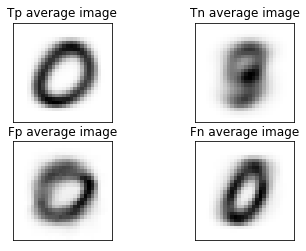



about test set
Tp: 900 Tn: 8953 Fp: 67 Fn: 80


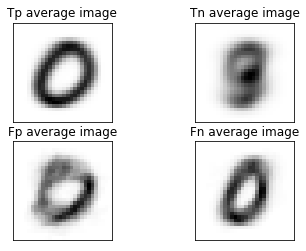




---------------------------------------
when p=  512

about training set
Tp: 5340 Tn: 53738 Fp: 339 Fn: 583
optimal model parameter when p is  512 :  3688.0


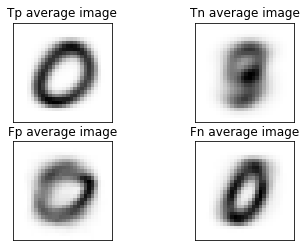



about test set
Tp: 919 Tn: 8960 Fp: 60 Fn: 61


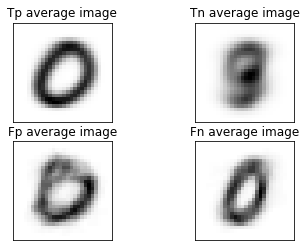




---------------------------------------
when p=  1024

about training set
Tp: 5347 Tn: 53759 Fp: 318 Fn: 576
optimal model parameter when p is  1024 :  3576.0


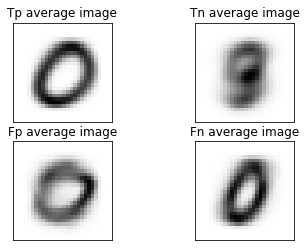



about test set
Tp: 917 Tn: 8959 Fp: 61 Fn: 63


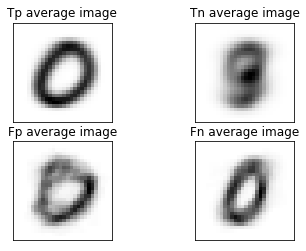

In [22]:
classifier_0_with_randomfeatures(2**3)
classifier_0_with_randomfeatures(2**4)
classifier_0_with_randomfeatures(2**5)
classifier_0_with_randomfeatures(2**6)
classifier_0_with_randomfeatures(2**7)
classifier_0_with_randomfeatures(2**8)
classifier_0_with_randomfeatures(2**9)
classifier_0_with_randomfeatures(2**10)